#Miniproyecto 1 - Análisis multivariado

**Autores:**  

*   Juan José Torres Patiño
*   Juan Diego Sánchez Ramos

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

## Librerías

In [1]:
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
from scipy.signal import find_peaks
import pandas as pd

#Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [49]:
from scipy import signal
import warnings; warnings.filterwarnings("ignore")

# 1. Datos

## Cargar matrices

In [3]:
datosP1 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s14.mat")
datosP2 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s15.mat")
datosP3 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s16.mat")
datosP4 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s17.mat")

## División entre Labels y Datos de la Señal

In [4]:
signalsP1 = datosP1['data']
etiquetasP1 = datosP1['labels']

signalsP2 = datosP2['data']
etiquetasP2 = datosP2['labels']

signalsP3 = datosP3['data']
etiquetasP3 = datosP3['labels']

signalsP4 = datosP4['data']
etiquetasP4 = datosP4['labels']

# 2. Características

## Gráficas

In [5]:
#Gráficas
def graficaP(x1, x2, x3, x4, nombre, color1, color2, color3, color4):
  plt.figure(figsize=(10,6))
  plt.subplot(2,2,1)
  plt.plot(x1, color1)
  plt.title(f'{nombre} 1')

  plt.subplot(2,2,2)
  plt.plot(x2, color2)
  plt.title(f'{nombre} 2')

  plt.subplot(2,2,3)
  plt.plot(x3, color3)
  plt.title(f'{nombre} 3')

  plt.subplot(2,2,4)
  plt.plot(x4, color4)
  plt.title(f'{nombre} 4')

  plt.tight_layout()
  plt.show()

## Respuesta Galbánica

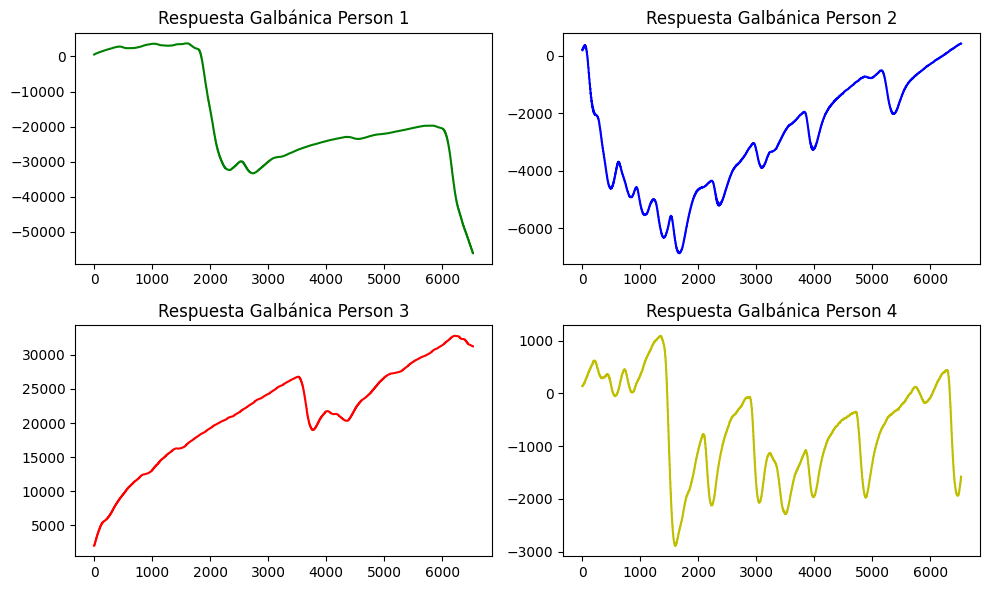

In [6]:
GSR_P1 = np.squeeze(signalsP1[0,36,:])
GSR_P2 = signalsP2[0,36,:]
GSR_P3 = signalsP3[0,36,:]
GSR_P4 = signalsP4[0,36,:]

graficaP(GSR_P1, GSR_P2, GSR_P3, GSR_P4,'Respuesta Galbánica Person', 'g', 'b', 'r', 'y')

## Presión Sanguínea

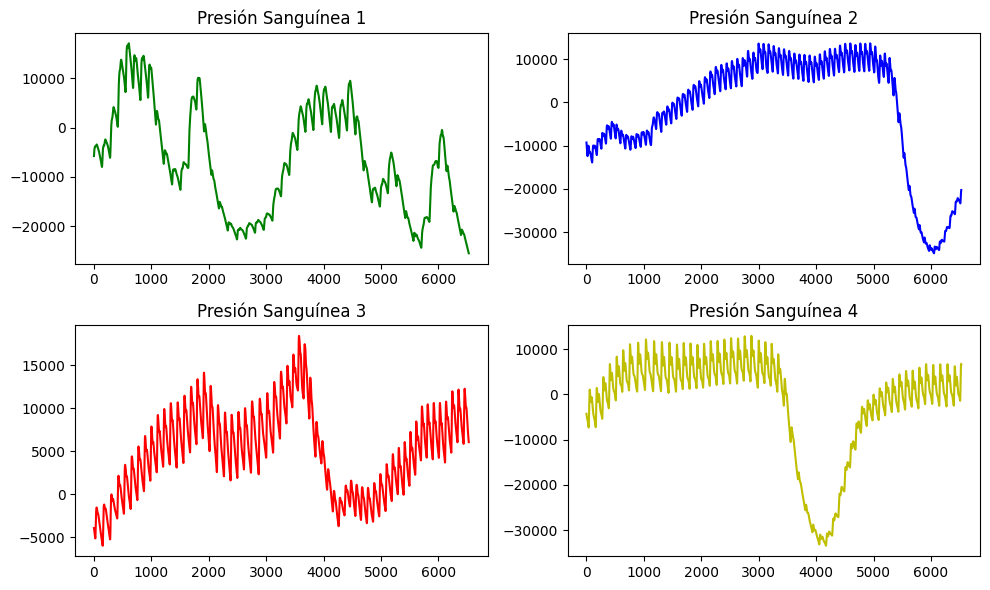

In [7]:
BVP_P1 = signalsP1[0,38,:]
BVP_P2 = signalsP2[0,38,:]
BVP_P3 = signalsP3[0,38,:]
BVP_P4 = signalsP4[0,38,:]

graficaP(BVP_P1, BVP_P2, BVP_P3, BVP_P4,'Presión Sanguínea', 'g', 'b', 'r', 'y')

## Respiración

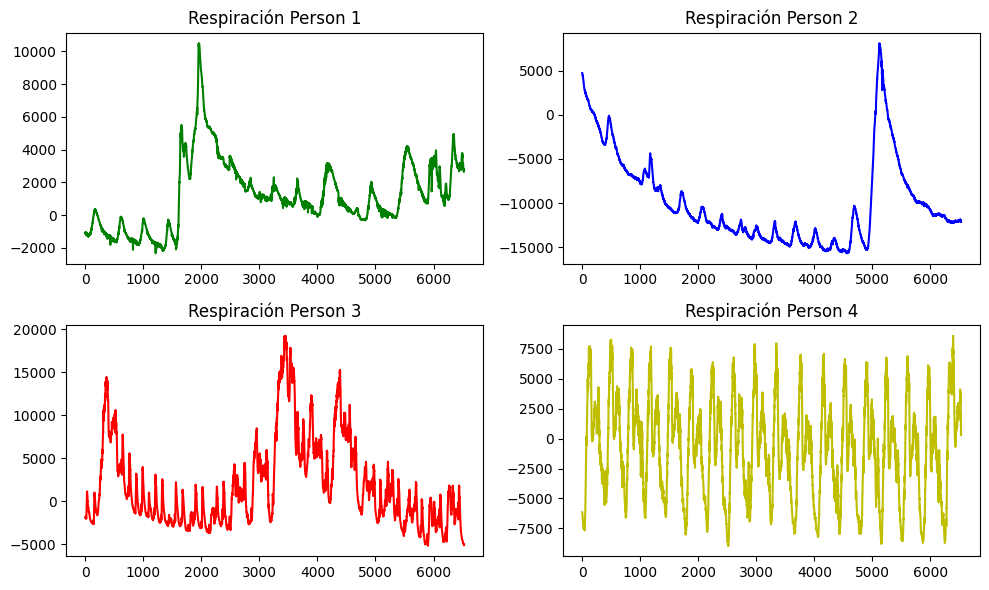

In [8]:
R_P1 = signalsP1[0,37,:]
R_P2 = signalsP2[0,37,:]
R_P3 = signalsP3[0,37,:]
R_P4 = signalsP4[0,37,:]

graficaP(R_P1, R_P2, R_P3, R_P4,'Respiración Person', 'g', 'b', 'r', 'y')

## Temperatura de la Piel

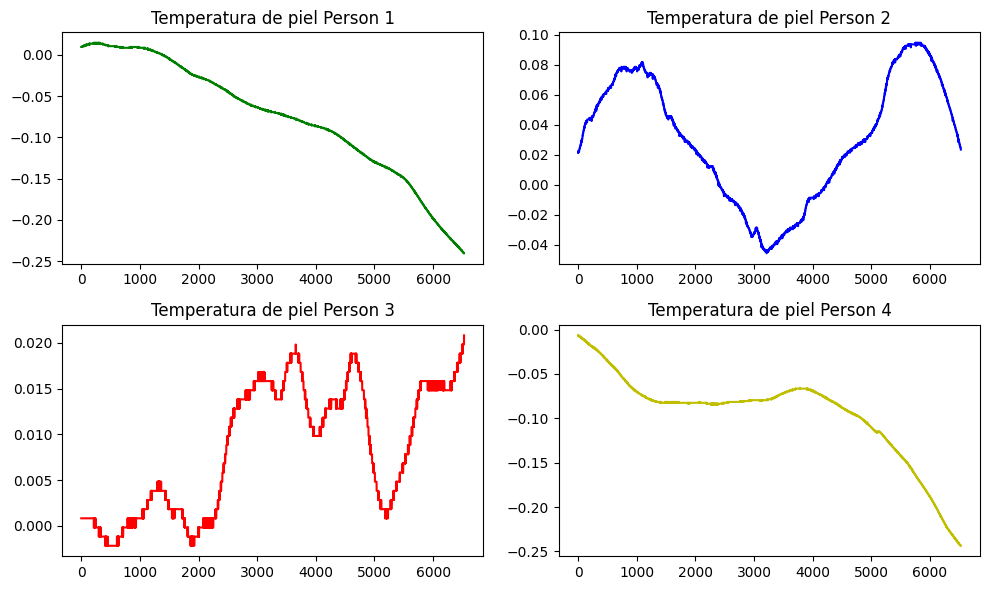

In [9]:
ST_P1 = signalsP1[0,39,:]
ST_P2 = signalsP2[0,39,:]
ST_P3 = signalsP3[0,39,:]
ST_P4 = signalsP4[0,39,:]

graficaP(ST_P1, ST_P2, ST_P3, ST_P4,'Temperatura de piel Person', 'g', 'b', 'r', 'y')

## Ojos

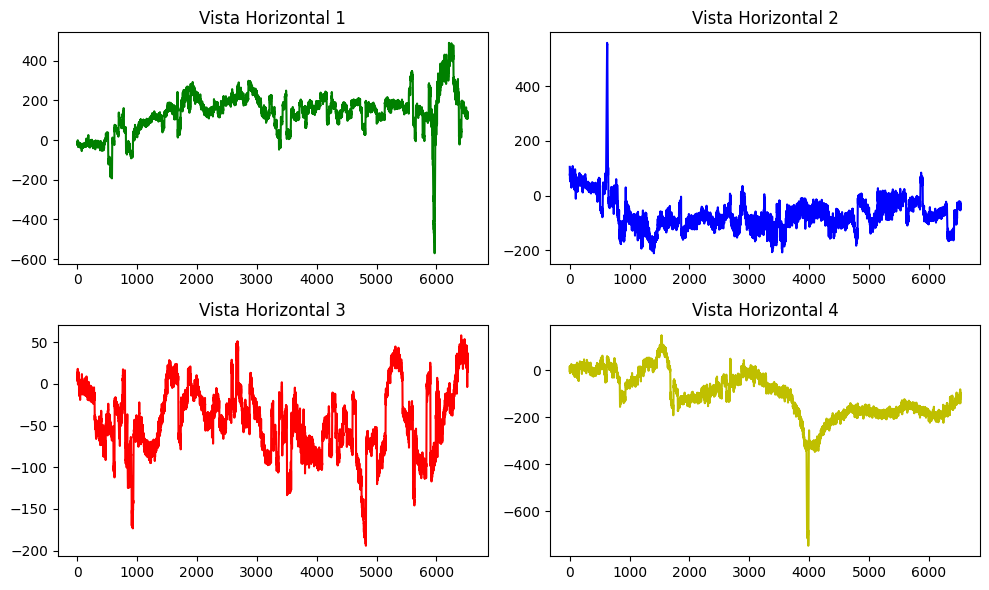

In [10]:
hEOG_P1 = signalsP1[0,32,:]
hEOG_P2 = signalsP2[0,32,:]
hEOG_P3 = signalsP3[0,32,:]
hEOG_P4 = signalsP4[0,32,:]

graficaP(hEOG_P1, hEOG_P2, hEOG_P3, hEOG_P4,'Vista Horizontal', 'g', 'b', 'r', 'y')

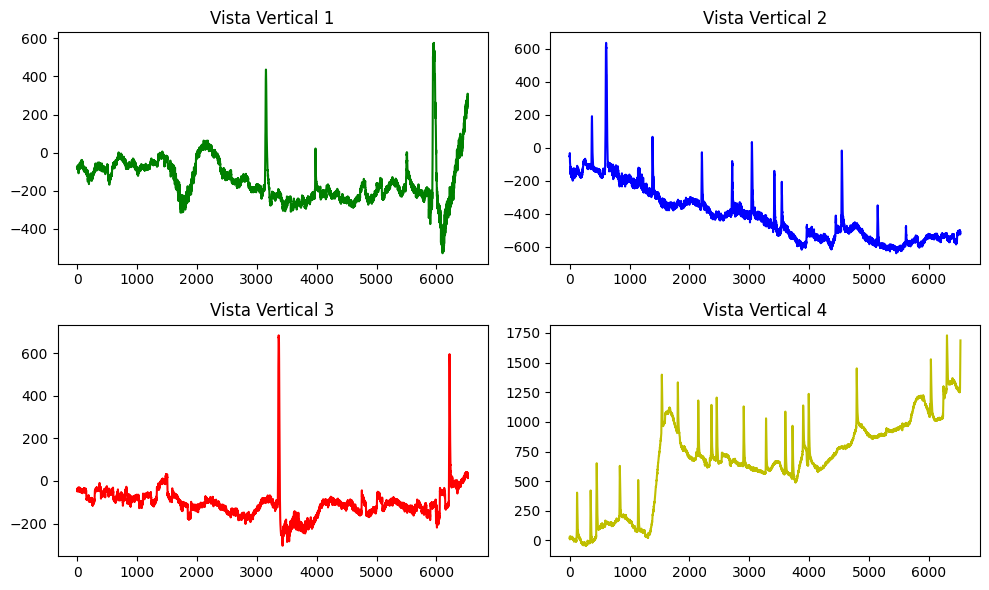

In [11]:
vEOG_P1 = signalsP1[0,33,:]
vEOG_P2 = signalsP2[0,33,:]
vEOG_P3 = signalsP3[0,33,:]
vEOG_P4 = signalsP4[0,33,:]

graficaP(vEOG_P1, vEOG_P2, vEOG_P3, vEOG_P4,'Vista Vertical', 'g', 'b', 'r', 'y')

## Mejillas

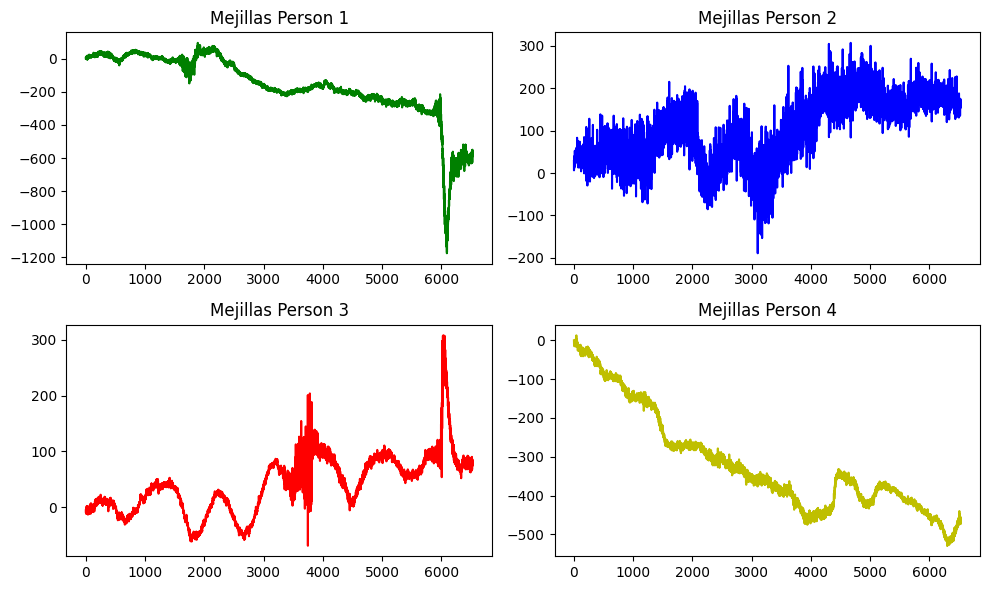

In [12]:
zEMG_P1 = signalsP1[0,34,:]
zEMG_P2 = signalsP2[0,34,:]
zEMG_P3 = signalsP3[0,34,:]
zEMG_P4 = signalsP4[0,34,:]

graficaP(zEMG_P1, zEMG_P2, zEMG_P3, zEMG_P4,'Mejillas Person', 'g', 'b', 'r', 'y')

## Espalda

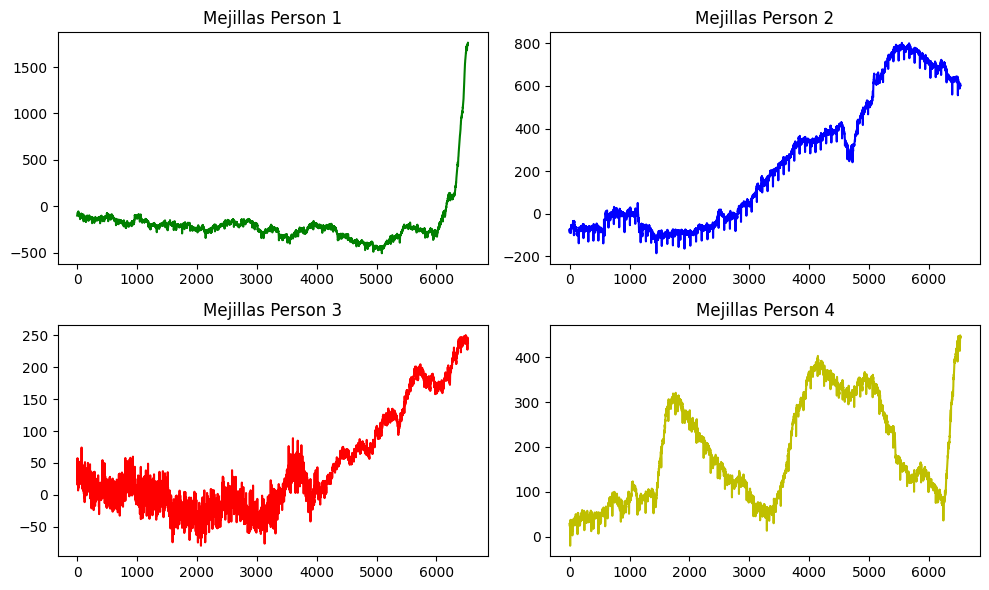

In [13]:
tEMG_P1 = signalsP1[0,35,:]
tEMG_P2 = signalsP2[0,35,:]
tEMG_P3 = signalsP3[0,35,:]
tEMG_P4 = signalsP4[0,35,:]

graficaP(tEMG_P1, tEMG_P2, tEMG_P3, tEMG_P4,'Mejillas Person', 'g', 'b', 'r', 'y')

# 3. Definición de etiquetas

## Persona 1

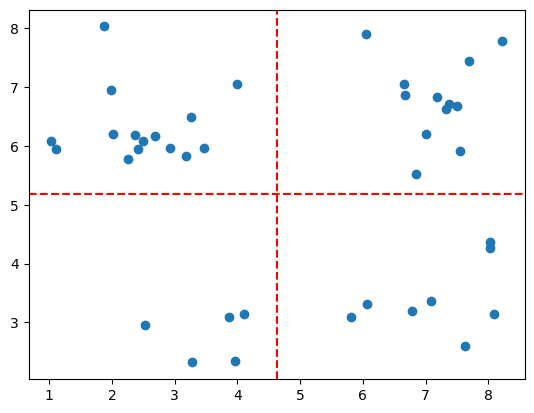

In [14]:
arousal = etiquetasP1[:,1]
valence = etiquetasP1[:,0]
emocion_P1 = np.zeros(np.size(arousal))
emocion_P1[valence<=4] = 0
emocion_P1[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P1[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

## Persona 2

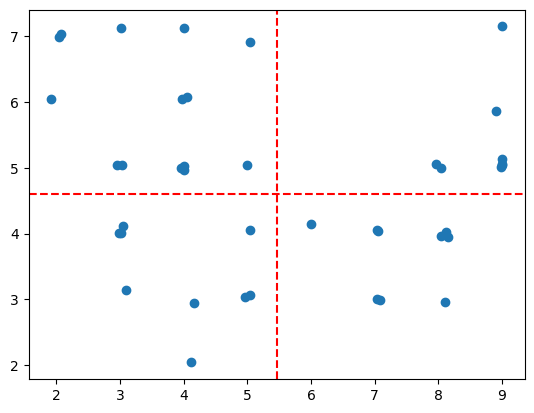

In [15]:
arousal = etiquetasP2[:,1]
valence = etiquetasP2[:,0]
emocion_P2 = np.zeros(np.size(arousal))
emocion_P2[valence<=4] = 0
emocion_P2[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P2[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

## Persona 3

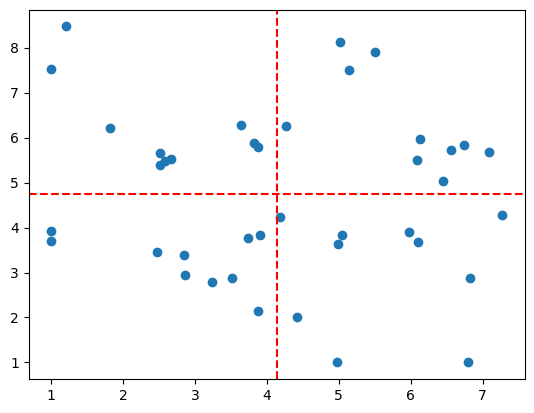

In [16]:
arousal = etiquetasP3[:,1]
valence = etiquetasP3[:,0]
emocion_P3 = np.zeros(np.size(arousal))
emocion_P3[valence<=4] = 0
emocion_P3[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P3[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

## Persona 4

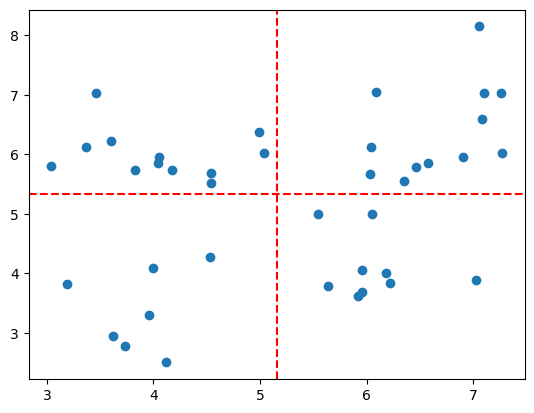

In [17]:
arousal = etiquetasP4[:,1]
valence = etiquetasP4[:,0]
emocion_P4 = np.zeros(np.size(arousal))
emocion_P4[valence<=4] = 0
emocion_P4[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P4[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

#4. Extracción de características

### GSR
Average Skin Resistance, Average of derivate for negative values only, 10 spectral power in the [0-2.4]Hz bands.

In [18]:
def caracteristicas_GSR(gsr_signal, fs=128):

    #Promedio
    AverageSkinGSR = np.mean(gsr_signal)
    sig = gsr_signal
    sos = signal.butter(10, 2.4, 'lp', fs=128, output='sos')
    filtered = signal.sosfilt(sos, sig)
    T = 1./fs
    yf = np.fft.fft(filtered)
    N = len(filtered)
    xf = np.fft.fftfreq(N, T)[0:N//2]
    yf_abs = 2.0/N * np.abs(yf[0:N//2])

    # Ordenar las frecuencias por amplitud
    sorted_indices = np.argsort(np.abs(yf_abs))[::-1]

    # Obtener las 10 frecuencias principales en la banda de interés
    top_10_freqs = xf[sorted_indices][:10]
    top_10_powers =yf_abs[sorted_indices][:10]

    valoresneg = gsr_signal[gsr_signal < 0]

    if valoresneg.any():
      derivada = np.diff(valoresneg)
      average_decrease= np.mean(derivada)

    else:
      average_decrease = 0



    TrescosasGSR = [AverageSkinGSR,average_decrease]

    for j in range(0,10):
      TrescosasGSR.append(top_10_powers[j])
    for k in range(0,10):
      TrescosasGSR.append(top_10_freqs[k])
    return TrescosasGSR

### Presión Sanguínea
Average and standar deviation of HR, Spectral power in the bands ([0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz).

In [19]:
import numpy as np

def caracteristicas_PS(bvp_signal, fs=128): #ESTA MALO



    # Encuentra los picos correspondientes a los latidos cardíacos.
    peaks, _ = find_peaks(bvp_signal, height=0.0)

    # Calcula los intervalos de tiempo entre picos consecutivos (intervalos RR).
    rr_intervals = np.diff(peaks) / fs

    # Calcula la frecuencia cardíaca instantánea (HR) para cada intervalo RR.
    hr_instantaneous = 60 / rr_intervals

    # Calcula la frecuencia cardíaca promedio.
    AveragePS = np.mean(hr_instantaneous)



    #Desviación estándar
    DS = np.std(hr_instantaneous)



    # Supongamos que tienes una señal de presión sanguínea o respiración llamada "respiratory_signal" y una frecuencia de muestreo "fs".

    # Filtrado pasa banda en la banda de 0.1 a 0.2 Hz
    sos_band1 = signal.butter(10, [0.1, 0.2], 'bandpass', fs=fs, output='sos')
    filtered_band1 = signal.sosfilt(sos_band1, bvp_signal)

    # Filtrado pasa banda en la banda de 0.2 a 0.3 Hz
    sos_band2 = signal.butter(10, [0.2, 0.3], 'bandpass', fs=fs, output='sos')
    filtered_band2 = signal.sosfilt(sos_band2, bvp_signal)

    # Filtrado pasa banda en la banda de 0.3 a 0.4 Hz
    sos_band3 = signal.butter(10, [0.3, 0.4], 'bandpass', fs=fs, output='sos')
    filtered_band3 = signal.sosfilt(sos_band3,bvp_signal)



    # Realiza el cálculo de la transformada de Fourier y la potencia para cada banda filtrada.
    fft_result_band1 = np.fft.fft(filtered_band1)
    fft_freqs_band1 = np.fft.fftfreq(len(filtered_band1), 1 / fs)
    power_spectrum_band1 = np.abs(fft_result_band1) ** 2

    fft_result_band2 = np.fft.fft(filtered_band2)
    fft_freqs_band2 = np.fft.fftfreq(len(filtered_band2), 1 / fs)
    power_spectrum_band2 = np.abs(fft_result_band2) ** 2

    fft_result_band3 = np.fft.fft(filtered_band3)
    fft_freqs_band3 = np.fft.fftfreq(len(filtered_band3), 1 / fs)
    power_spectrum_band3 = np.abs(fft_result_band3) ** 2

    # Calcular la potencia en cada banda de frecuencia
    power_in_range1 = np.sum(power_spectrum_band1) / len(filtered_band1) / fs
    power_in_range2 = np.sum(power_spectrum_band2) / len(filtered_band2) / fs
    power_in_range3 = np.sum(power_spectrum_band3) / len(filtered_band3) / fs




    TrescosasBVP = np.array([AveragePS, DS, power_in_range1, power_in_range2, power_in_range3])

    return TrescosasBVP

### Respiración
Average respiration signal, average peak to peak time, 10 spectral power in the bands from 0 to 2.4 Hz.

In [20]:
def caracteristicas_R(respiratory_signal, fs=128):

    #Promedio
    AverageRS = np.mean(respiratory_signal)





  # Encuentra los máximos y mínimos locales de la señal de respiración.
    peaks_max, _ = find_peaks(respiratory_signal, height=0.0)
    peaks_min, _ = find_peaks(-respiratory_signal, height=0.0)

    # Combina los picos máximos y mínimos en una sola lista.
    all_peaks = np.sort(np.concatenate((peaks_max, peaks_min)))

    # Calcula el período (intervalo de tiempo) entre picos consecutivos.
    periods = np.diff(all_peaks) / fs

    average_p2p_time = np.mean(periods)

    sig = respiratory_signal
    sos = signal.butter(10, 2.4, 'lp', fs=128, output='sos')
    filtered = signal.sosfilt(sos, sig)
    T = 1./fs
    yf = np.fft.fft(filtered)
    N = len(filtered)
    xf = np.fft.fftfreq(N, T)[0:N//2]
    yf_abs = 2.0/N * np.abs(yf[0:N//2])

    # Ordenar las frecuencias por amplitud
    sorted_indices = np.argsort(np.abs(yf_abs))[::-1]

    # Obtener las 10 frecuencias principales en la banda de interés
    top_10_freqs = xf[sorted_indices][:10]
    top_10_powers =yf_abs[sorted_indices][:10]


    TrescosasST = [AverageRS, average_p2p_time]

    for j in range(0,10):
      TrescosasST.append(top_10_powers[j])
    for k in range(0,10):
      TrescosasST.append(top_10_freqs[k])

    return TrescosasST

### Temperatura
Average, Average of its derivative, Spectral power in the bands ([0-0.1Hz],[0.1-0.2]Hz).

In [53]:
# Calcula la derivada de los valores negativos
def caracteristicas_T(T_signal, fs=128):

  #Promedio
    AverageSkinT = np.mean(T_signal)

  #Derivada
    derivadaT = np.diff(T_signal)

# Calcula el promedio de la derivada
    promedioDerivada = np.mean(derivadaT)

    sig = T_signal
    sos = signal.butter(10, 0.1, 'lp', fs=128, output='sos')
    filtered = signal.sosfilt(sos, sig)
    T = 1./fs
    yf = np.fft.fft(filtered)
    N = len(filtered)
    xf = np.fft.fftfreq(N, T)[0:N//2]
    yf_abs = 2.0/N * np.abs(yf[0:N//2])
    band_power = np.sum(np.abs(yf_abs) ** 2)/len(T_signal)/fs

    sos1 = signal.butter(10, [0.1,0.2], 'bandpass', fs=128, output='sos')
    filtered1 = signal.sosfilt(sos1, sig)
    T = 1./fs
    yf1 = np.fft.fft(filtered1)
    N1 = len(filtered1)
    xf = np.fft.fftfreq(N1, T)[0:N1//2]
    yf_abs1 = 2.0/N1 * np.abs(yf1[0:N1//2])
    band_power1 = np.sum(np.abs(yf_abs1) ** 2)/len(T_signal)/fs

    TrescosasT = np.array([AverageSkinT, promedioDerivada, band_power, band_power1])
    return TrescosasT

### EMG and EOG

Energy of the signal, Mean and variance of the signal.

In [22]:
def caracteristicas_EMG_EOG(EMG_EOG_signal):
  #Promedio
  AverageEMGEOG = np.mean(EMG_EOG_signal)

  #Desviación Estándar
  DSEMG_EOG = np.std(EMG_EOG_signal)

  #Energía de la señal
  Energy = np.sum(i**2  for i in EMG_EOG_signal)

  TrescosasEMG_EOG = np.array([AverageEMGEOG, DSEMG_EOG, Energy])

  return TrescosasEMG_EOG

### EEG
Alpha, Beta and Gamma

In [48]:


def caracteristicas_EEG(EEG_signal, fs=128):

    # Alpha (8 - 12Hz)
    sos = signal.butter(4, [8, 12], 'band', fs=fs, output='sos')
    filtered_A = signal.sosfilt(sos, EEG_signal)
    power_A = np.mean(np.abs(np.fft.fft(filtered_A)) ** 2)

    # Beta (12 - 30Hz)
    sos = signal.butter(4, [12, 30], 'band', fs=fs, output='sos')
    filtered_B = signal.sosfilt(sos, EEG_signal)
    power_B = np.mean(np.abs(np.fft.fft(filtered_B)) ** 2)

    # Gamma (30 - 100Hz)
    sos = signal.butter(4, [30, 100], 'band', fs=fs, output='sos')
    filtered_G = signal.sosfilt(sos, EEG_signal)
    power_G = np.mean(np.abs(np.fft.fft(filtered_G)) ** 2)

    return np.array([power_A, power_B, power_G])


# 5. Agrupación de Características

In [24]:
def caracteristicas (signal, numero, posicion=0):
 vector1 = []
 vector2 = []
 vector3 = []
 vector4 = []

  #GSR
 if numero == '0':
  for i in range (0,40):
    vector1.append(caracteristicas_GSR(signal[0][i,36,:],128))
    vector2.append(caracteristicas_GSR(signal[1][i,36,:],128))
    vector3.append(caracteristicas_GSR(signal[2][i,36,:],128))
    vector4.append(caracteristicas_GSR(signal[3][i,36,:],128))

  #PresionSanguinea
 elif numero == '1':
  for i in range (0,40):
    vector1.append(caracteristicas_PS(signal[0][i,38,:]))
    vector2.append(caracteristicas_PS(signal[1][i,38,:]))
    vector3.append(caracteristicas_PS(signal[2][i,38,:]))
    vector4.append(caracteristicas_PS(signal[3][i,38,:]))
  #Respiracion
 elif numero == '2':
  for i in range (0,40):
    vector1.append(caracteristicas_R(signal[0][i,37,:],128))
    vector2.append(caracteristicas_R(signal[1][i,37,:],128))
    vector3.append(caracteristicas_R(signal[2][i,37,:],128))
    vector4.append(caracteristicas_R(signal[3][i,37,:],128))

  #Temperatura
 elif numero == '3':
  for i in range (0,40):
    vector1.append(caracteristicas_T(signal[0][i,39,:],128))
    vector2.append(caracteristicas_T(signal[1][i,39,:],128))
    vector3.append(caracteristicas_T(signal[2][i,39,:],128))
    vector4.append(caracteristicas_T(signal[3][i,39,:],128))

  #EMG_EOG
 elif numero == '4':
  for i in range (0,40):
    vector1.append(caracteristicas_EMG_EOG(signal[0][i,posicion,:]))
    vector2.append(caracteristicas_EMG_EOG(signal[1][i,posicion,:]))
    vector3.append(caracteristicas_EMG_EOG(signal[2][i,posicion,:]))
    vector4.append(caracteristicas_EMG_EOG(signal[3][i,posicion,:]))

 elif numero == '5':
  for i in range (0,40):
    vector1.append(caracteristicas_EEG(signal[0][i,posicion,:]))
    vector2.append(caracteristicas_EEG(signal[1][i,posicion,:]))
    vector3.append(caracteristicas_EEG(signal[2][i,posicion,:]))
    vector4.append(caracteristicas_EEG(signal[3][i,posicion,:]))

 return np.vstack([vector1, vector2, vector3, vector4])

In [25]:
#GSR
vectorGSR = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], '0')
vectorGSR.shape

(160, 22)

In [50]:
#PS
vectorPS = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], '1')
vectorPS.shape

(160, 5)

In [27]:
#Respiración
vectorR = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], '2')
vectorR.shape

(160, 22)

In [28]:
#Temperatura
vectorT = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], '3')
vectorT.shape

(160, 4)

In [51]:
#EOG
vectorHEOG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'4',posicion=32)
vectorVEOG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'4',posicion=33)

print(vectorHEOG.shape)
print(vectorVEOG.shape)

(160, 3)
(160, 3)


In [52]:
#EMG
vectorZEMG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'4',posicion=34)
vectorTEMG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'4',posicion=35)

print(vectorZEMG.shape)
print(vectorTEMG.shape)

(160, 3)
(160, 3)


In [31]:
#EEG
vectorEEG_O1 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=15)
vectorEEG_O2 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=17)
vectorEEG_C3 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=8)
vectorEEG_C4 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=23)
vectorEEG_F7 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=3)
vectorEEG_F8 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=28)
vectorEEG_T7 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=7)
vectorEEG_T8 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=24)
vectorEEG_P3 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=12)
vectorEEG_P4 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4],'5',posicion=19)

print(vectorEEG_O1.shape)
print(vectorEEG_O2.shape)
print(vectorEEG_C3.shape)
print(vectorEEG_C4.shape)
print(vectorEEG_F7.shape)
print(vectorEEG_F8.shape)
print(vectorEEG_T7.shape)
print(vectorEEG_T8.shape)
print(vectorEEG_P3.shape)
print(vectorEEG_P4.shape)

(160, 3)
(160, 3)
(160, 3)
(160, 3)
(160, 3)
(160, 3)
(160, 3)
(160, 3)
(160, 3)
(160, 3)


# 6. DataFrame

In [32]:
nombres = ['Promedio GSR', 'PromedioDevNeg', 'Potencia 1 GSR', 'Potencia 2 GSR', 'Potencia 3 GSR', 'Potencia 4 GSR', 'Potencia 5 GSR', 'Potencia 6 GSR', 'Potencia 7 GSR', 'Potencia 8 GSR', 'Potencia 9 GSR', 'Potencia 10 GSR',
           'Freq1 GSR', 'Freq2 GSR', 'Freq3 GSR', 'Freq4 GSR', 'Freq5 GSR', 'Freq6 GSR', 'Freq7 GSR', 'Freq8 GSR', 'Freq9 GSR', 'Freq10 GSR', 'Promedio PS', 'DesviaciónE PS', 'PotEspecBandPS[0.1-0.2]', 'PotEspecBandPS[0.2-0.3]',
           'PotEspecBandPS[0.3-0.4]', 'Promedio Resp', 'Tiempo pro pap', 'Potencia 1 Resp', 'Potencia 2 Resp', 'Potencia 3 Resp', 'Potencia 4 Resp', 'Potencia 5 Resp', 'Potencia 6 Resp', 'Potencia 7 Resp', 'Potencia 8 Resp',
           'Potencia 9 Resp', 'Potencia 10 Resp', 'Freq1 Resp', 'Freq2 Resp', 'Freq3 Resp', 'Freq4 Resp', 'Freq5 Resp', 'Freq6 Resp','Freq7 Resp', 'Freq8 Resp', 'Freq9 Resp', 'Freq10 Resp', 'Promedio Temp',
           'PromedioDev Temp', 'PotEspecBandTemp[0-0.1]', 'PotEspecBandTemp[0.1-0.2]', 'Promedio HEOG', 'DesviaciónE HEOG', 'Energía HEOG', 'Promedio VEOG', 'DesviaciónE VEOG', 'Energía VEOG', 'Promedio ZEMG',
           'DesviaciónE ZEMG', 'Energía ZEMG', 'Promedio TEMG', 'DesviaciónE TEMG', 'Energía TEMG', 'Pot Alpha O1', 'Pot Beta O1', 'Pot Gamma O1', 'Pot Alpha O2', 'Pot Beta O2', 'Pot Gamma O2', 'Pot Alpha C3', 'Pot Beta C3',
           'Pot Gamma C3', 'Pot Alpha C4', 'Pot Beta C4', 'Pot Gamma C4', 'Pot Alpha F7', 'Pot Beta F7', 'Pot Gamma F7', 'Pot Alpha F8', 'Pot Beta F8', 'Pot Gamma F8', 'Pot Alpha T7', 'Pot Beta T7', 'Pot Gamma T7',
           'Pot Alpha T8', 'Pot Beta T8', 'Pot Gamma T8', 'Pot Alpha P3', 'Pot Beta P3', 'Pot Gamma P3', 'Pot Alpha P4', 'Pot Beta P4', 'Pot Gamma P4']

vector_caracteristicas = np.hstack([vectorGSR, vectorPS, vectorR, vectorT, vectorHEOG, vectorVEOG, vectorZEMG, vectorTEMG, vectorEEG_O1, vectorEEG_O2,
                                   vectorEEG_C3, vectorEEG_C4, vectorEEG_F7, vectorEEG_F8, vectorEEG_T7, vectorEEG_T8, vectorEEG_P3, vectorEEG_P4])

datos_finales = pd.DataFrame(vector_caracteristicas)
datos_finales.columns = nombres

In [33]:
emociones = np.vstack([emocion_P1, emocion_P2, emocion_P3, emocion_P4])
vector_emociones = emociones.ravel()

datos_finales['Emociones'] = vector_emociones
datos_finales['Emociones'] = datos_finales['Emociones'].astype('category')
datos_finales

,Promedio GSR,PromedioDevNeg,Potencia 1 GSR,Potencia 2 GSR,Potencia 3 GSR,Potencia 4 GSR,Potencia 5 GSR,Potencia 6 GSR,Potencia 7 GSR,Potencia 8 GSR,...,Pot Alpha T8,Pot Beta T8,Pot Gamma T8,Pot Alpha P3,Pot Beta P3,Pot Gamma P3,Pot Alpha P4,Pot Beta P4,Pot Gamma P4,Emociones
0,-18005.683435,-11.957541,35101.815708,13178.637609,10943.625239,5227.748578,3659.268212,3582.305669,3303.168793,2967.102129,...,1.653601e-08,4.739491e-11,2.662758e-08,7.053266e-09,1.639640e-11,3.320249e-09,1.257930e-08,1.018911e-10,9.555834e-09,2.0
1,-8794.650746,-4.848997,17218.271567,9570.626201,6122.338964,2811.452175,2017.247881,1804.976555,1427.649930,1038.769936,...,1.043090e-10,1.869149e-10,3.310382e-10,4.133619e-10,1.029815e-11,2.277529e-10,4.569964e-10,1.575311e-10,1.865253e-11,1.0
2,-1331.408630,0.001537,3133.742160,2709.463519,992.901531,451.513567,338.611045,267.464809,227.198199,220.955966,...,9.579217e-09,1.524687e-11,4.865540e-11,2.048669e-11,9.293365e-12,2.915021e-10,7.168453e-10,1.016060e-10,4.108445e-12,2.0
3,3491.283824,0.856576,6948.160591,4281.636322,1838.875305,1426.125289,1114.163844,943.564315,927.775251,687.621528,...,3.281070e-08,2.138306e-11,6.215718e-10,5.439257e-09,6.339002e-11,4.322044e-10,2.640204e-08,5.692955e-11,8.249001e-11,2.0
4,-3736.386024,-1.330096,7342.836193,3939.745737,1644.788651,1378.645827,1323.621008,1272.618271,1083.620202,881.749938,...,1.283018e-10,2.230034e-12,4.690349e-10,1.427036e-10,7.037371e-12,2.319725e-09,1.350043e-11,9.200213e-14,1.093132e-09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,5204.994820,0.000000,10264.858344,1869.415737,1319.169388,967.213366,910.461461,484.434597,457.754573,389.221638,...,2.518417e-09,1.592030e-11,1.086120e-09,3.827691e-09,2.719602e-14,1.641649e-10,9.757307e-09,2.763553e-12,9.885959e-10,0.0
156,2975.633960,-0.015518,5796.412630,4123.242888,1063.102877,1037.915772,1013.496086,654.383367,563.667292,507.628846,...,1.659649e-09,5.500584e-12,5.353902e-10,1.783213e-09,2.751231e-12,2.314784e-10,1.114815e-08,6.069446e-12,3.044224e-09,0.0
157,7866.527529,0.000000,15463.890747,5536.833430,2237.235486,1391.740732,1175.259692,1011.831573,838.158038,639.688781,...,4.321767e-10,1.409547e-12,2.170027e-10,4.326277e-09,2.190207e-11,8.007754e-10,2.437710e-08,9.190466e-11,6.506849e-09,0.0
158,-2334.049943,-0.469599,4621.097401,1405.293496,864.042961,815.025314,799.044684,528.125969,466.127071,349.974232,...,5.241113e-09,3.423102e-11,1.325013e-11,5.266909e-09,2.079185e-11,3.008787e-10,8.292729e-08,4.075459e-10,2.954462e-09,2.0


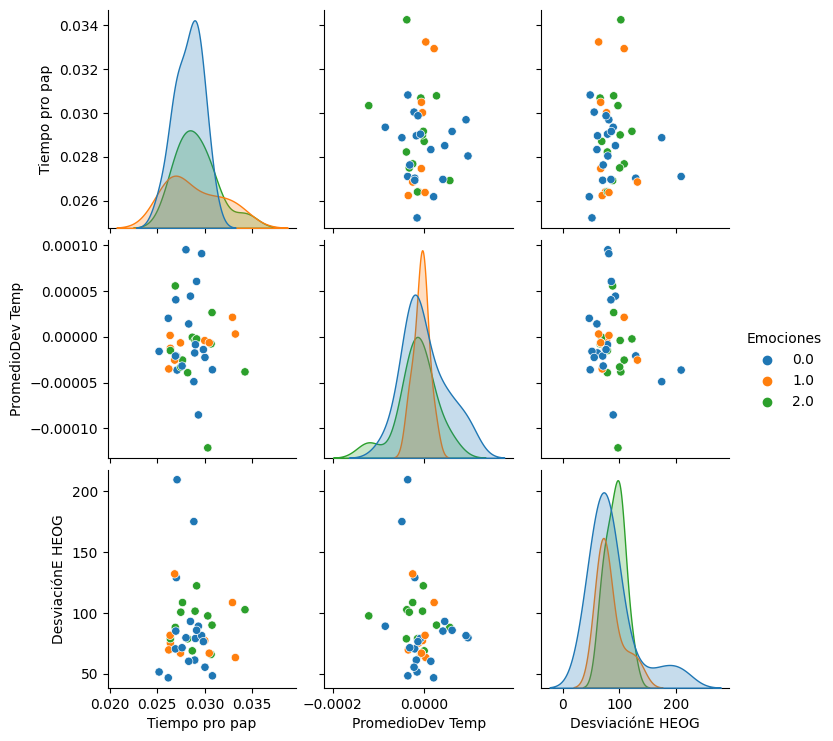

In [34]:
Datos1 = datos_finales.loc[0:39, ['Tiempo pro pap', 'PromedioDev Temp', 'DesviaciónE HEOG', 'Emociones']]

sns.pairplot(Datos1, hue='Emociones')

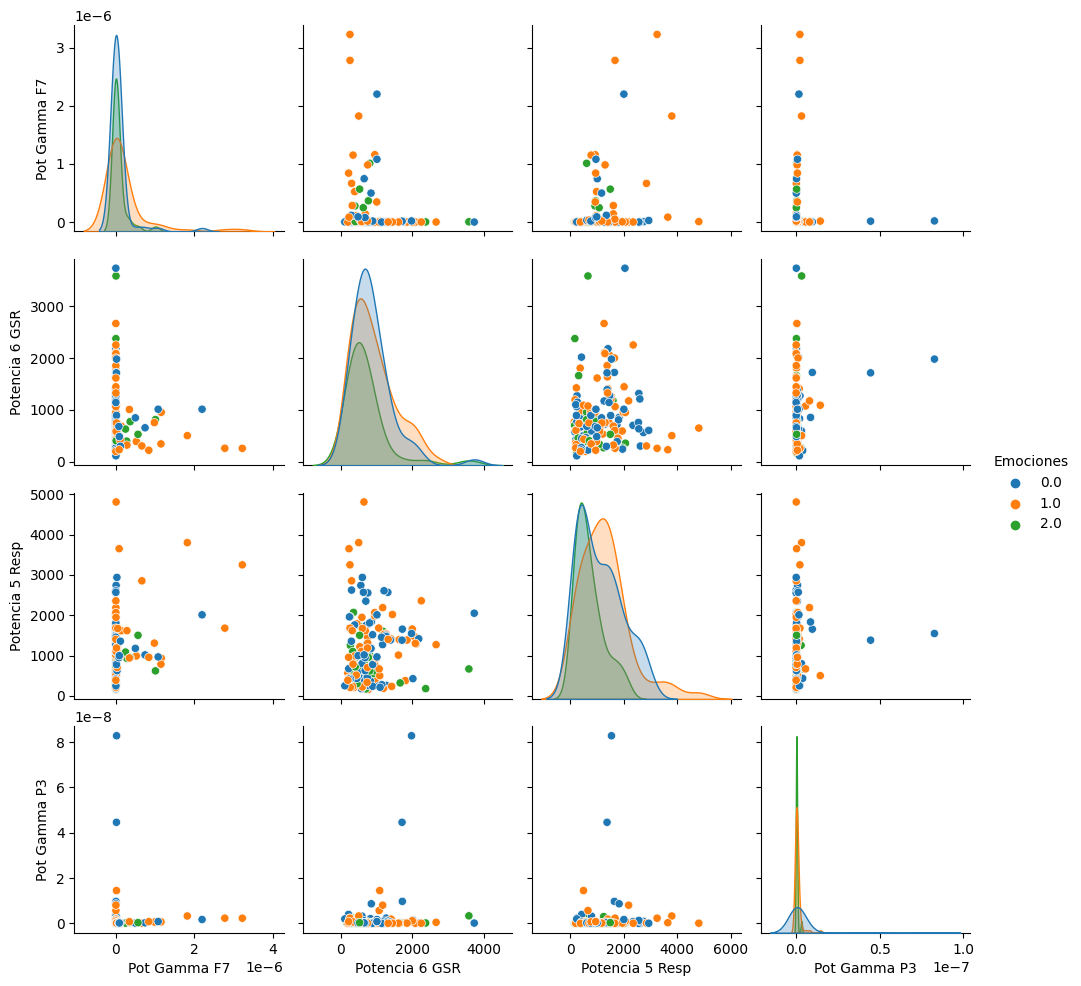

In [35]:
Datos2 = datos_finales.loc[0:159, ['Pot Gamma F7', 'Potencia 6 GSR', 'Potencia 5 Resp', 'Pot Gamma P3', 'Emociones']]

sns.pairplot(Datos2, hue='Emociones')

['Pot Alpha F7', 'DesviaciónE TEMG', 'Potencia 8 GSR', 'Pot Alpha P4', 'Potencia 5 Resp', 'Freq5 Resp', 'PromedioDev Temp', 'Potencia 5 GSR', 'Promedio Resp', 'Energía ZEMG', 'Pot Gamma O2', 'Potencia 8 Resp', 'Emociones']


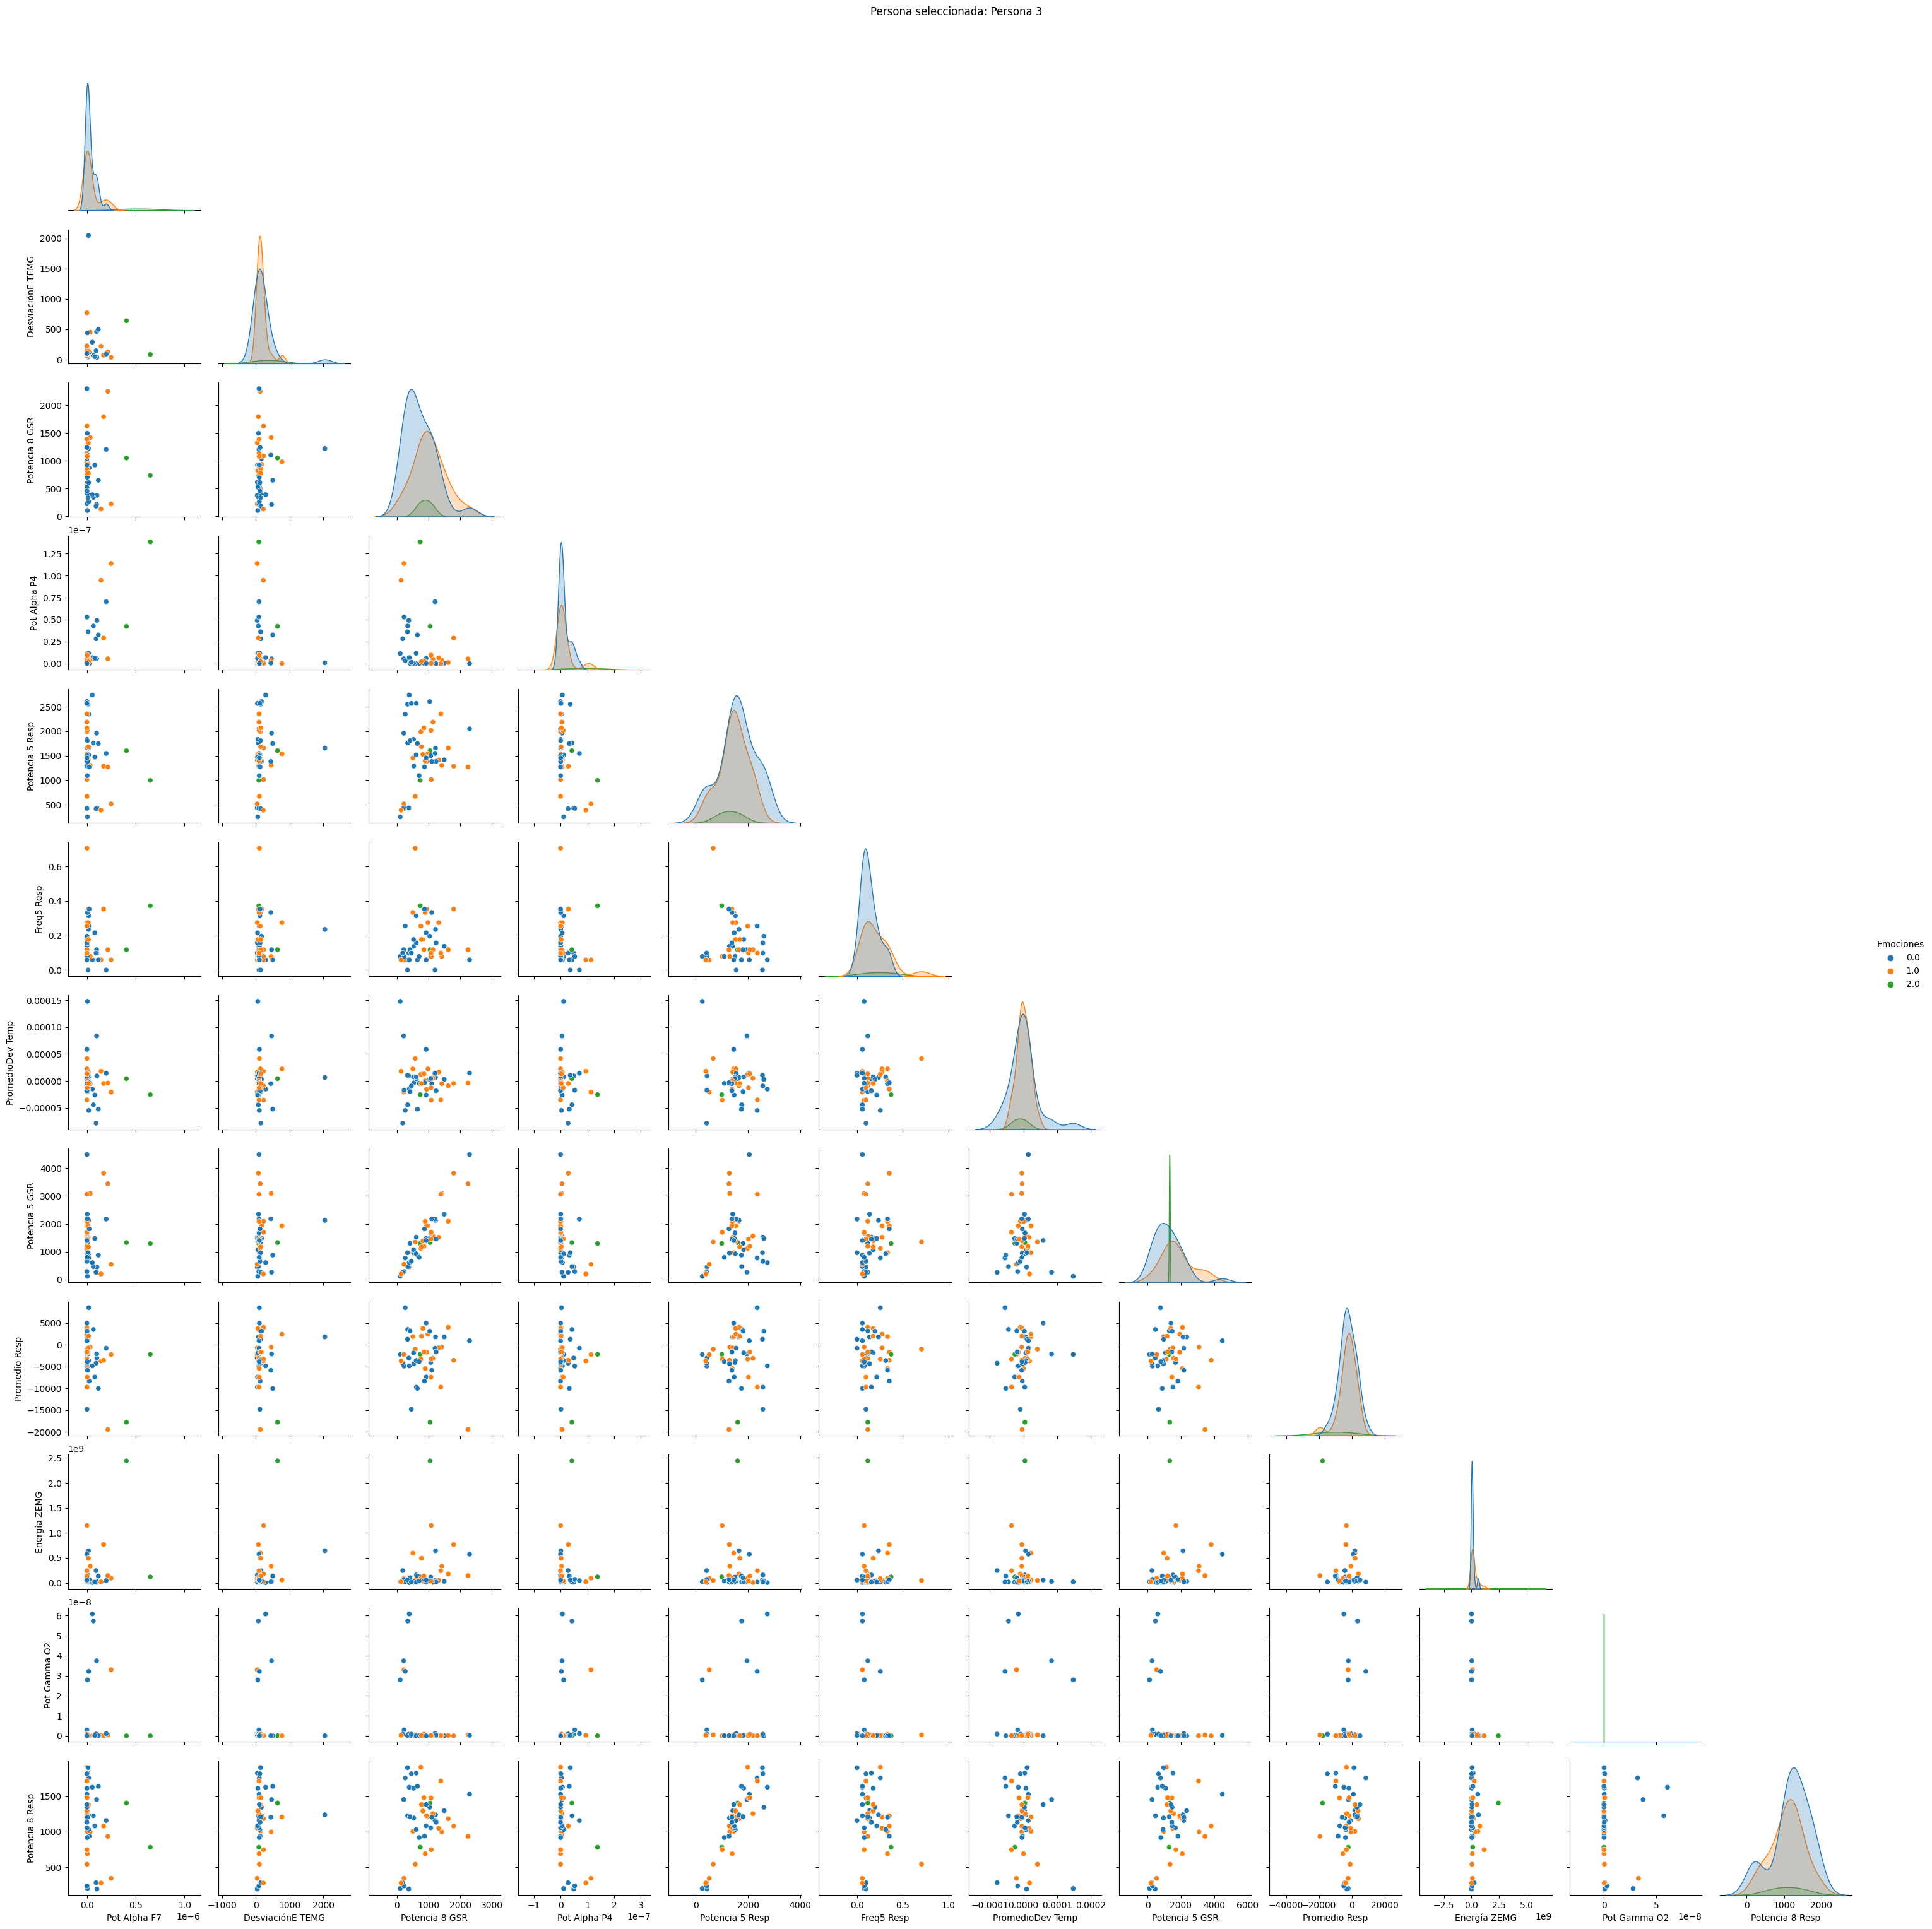

In [46]:
import random
nombres_aleatorios = random.sample(nombres, 12) # Se puede aumentar el número de características, pero con más de 8 se notó que se demora mucho en correr, pero al graficar solo la diagonal inferior se mejora el tiempo
nombres_aleatorios.append('Emociones')
print(nombres_aleatorios)
numero_aleatorio = random.randint(1, 4)
persona_seleccionada = f"Persona {numero_aleatorio}"
# Determinar el rango de filas según el número aleatorio
if numero_aleatorio == 1:
    inicio, fin = 0, 39
elif numero_aleatorio == 2:
    inicio, fin = 40, 79
elif numero_aleatorio == 3:
    inicio, fin = 70, 119
elif numero_aleatorio == 4:
    inicio, fin = 120, 159

datos3 = datos_finales.loc[inicio:fin,nombres_aleatorios]
pairplot = sns.pairplot(datos3, hue='Emociones',corner=True)

# Agregar etiqueta con el número de persona seleccionada
plt.text(0.5, 1.02, f"Persona seleccionada: {persona_seleccionada}", transform=plt.gcf().transFigure, fontsize=12, ha='center')

plt.show()

## Análisis y conclusiones.





**Interrelación de Variables y Emociones:** El proceso de extracción de características y su visualización revela que, aunque se pueden identificar ciertas tendencias en la discriminación de datos entre diferentes etiquetas emocionales, no se logra una separación clara en grupos. Esto puede deberse a la alta interrelación entre las variables y las emociones, lo que dificulta la distinción de patrones distintivos en los datos.

**Ventajas de la Extracción de Características:** Sin embargo, la extracción de características tiene ventajas significativas, ya que permite identificar qué efectos tienen un mayor impacto en las emociones de una persona y cómo los sentidos responden a estímulos específicos. Esto proporciona información valiosa sobre los factores que influyen en las respuestas emocionales.

**Desafíos en la Dispersión Emocional:** Es importante señalar que la dispersión de las emociones en los datos también puede ser el resultado de centrarse únicamente en la extracción de características en lugar de realizar predicciones directas sobre las emociones. Un enfoque predictivo podría ayudar a relacionar de manera más concreta las características con las etiquetas emocionales.

**Conclusiones:**

1. Las emociones humanas son complejas y multifacéticas, lo que puede dar lugar a superposición de datos y dificultades en la identificación de emociones específicas. El análisis de datos emocionales se enfoca en identificar patrones y tendencias en lugar de buscar conclusiones definitivas.

2. A pesar de la falta de separación evidente en grupos emocionales, la extracción de características sigue siendo un paso fundamental en la comprensión de las emociones, permitiendo la identificación de factores influyentes.

3. Al seleccionar solo tres etiquetas emocionales del mapa de emociones, se reduce la complejidad del problema al disminuir la dimensionalidad. Sin embargo, como mencionamos anteriormente, las características extraídas no proporcionan una distinción clara entre estas emociones. Esto posiblemente se debe a la naturaleza de las señales y a cómo se capturaron, aspectos que no se tuvieron completamente en cuenta en este estudio.

4. Las dimensiones reales se dan por la  cantidad de características extraídas, para este caso, si solo se colapsa a un espacio de 2 dimensiones como lo estamos haciendo, realmente no puede verse con tanta claridad el comportamiento o patrón para las emociones. Es decir, no se puede ver la distribución de datos completa. Es muy probable que si se ampliase a una dimensión más, este comportamiento podría verse con un poco más de detalle.

5. En general, se observa que la emoción 0, la cual se relaciona con bajos niveles de valencia, está más concentrada en los datos. Esta emoción se asocia comúnmente con sentimientos desagradables como tristeza, miedo, enojo y ansiedad. En contraste, otras emociones muestran una dispersión más amplia. Este patrón es valioso ya que permite una identificación más precisa de esta emoción en particular y, por ende, facilita la comprensión de los estados emocionales de la persona.



